
Homework Linear Regression
The dataset you are working is Boston Housing Price

The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target.

For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: from sklearn.model_selection import train_test_split

Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model

Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error


Apply data normalization (Scaling) to improve the prediction result
Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got

Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [45]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

bos.head()

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
def gotta_plot_them_all(data, second=None, alpha=1, color1='b', color2='r'):
    ploting_data = data
    fig, axs = plt.subplots(4,4, figsize=(20, 13))
    for i in range(len(ploting_data.columns)):
        axs[i//4][i%4].hist(ploting_data[ploting_data.columns[i]], alpha=alpha, color=color1)
        axs[i//4][i%4].title.set_text('Histogram for '+ploting_data.columns[i])
        if second is not None:
            lst = []
            for j in range(10):
                lst += list(second[second.columns[i]])
            axs[i//4][i%4].hist(lst, alpha=alpha, color=color2)
    plt.show()

In [4]:
def gotta_scatter_plot_them_all(data):
    ploting_data = data
    fig, axs = plt.subplots(4,4, figsize=(20, 13))
    for i in range(len(ploting_data.columns)):
        X = ploting_data[ploting_data.columns[i]]
        y = ploting_data['PRICE']
        axs[i//4][i%4].scatter(X, y)
        
        y = np.array(y)
        X = np.array(X)
        X = X.reshape(-1,1)
        y = y.reshape(-1, 1)

        basic_reg = LinearRegression()
        basic_reg.fit(X, y)
        y_pred = basic_reg.predict(X)

        axs[i//4][i%4].plot(ploting_data[ploting_data.columns[i]], y_pred, color='red')
        mse = mean_squared_error(y, y_pred)
        r_sqr = r2_score(y, y_pred)
        axs[i//4][i%4].title.set_text('y = PRICE, x = '+ploting_data.columns[i]+', Mse = '+str(int(mse))+'R^2 = '+str(int(r_sqr)))
    plt.show()


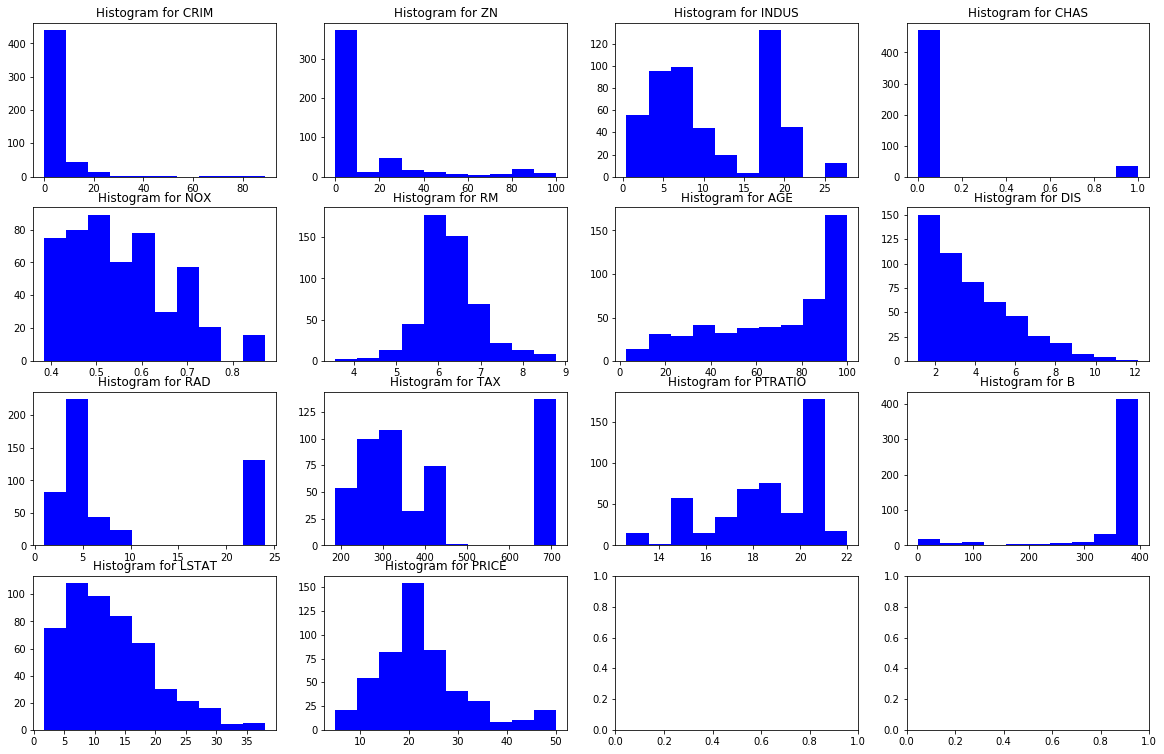

In [5]:
gotta_plot_them_all(bos)

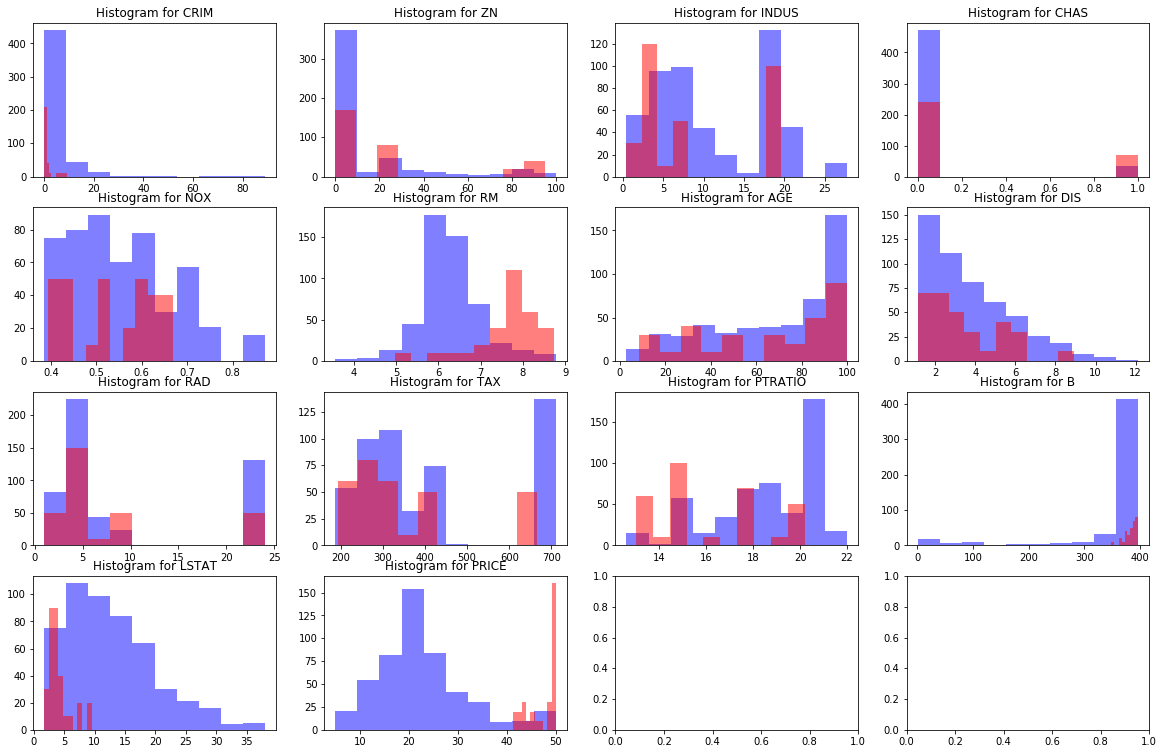

In [6]:
gotta_plot_them_all(bos, second=bos[bos['PRICE'] >= 40], alpha=0.5, color2='r')

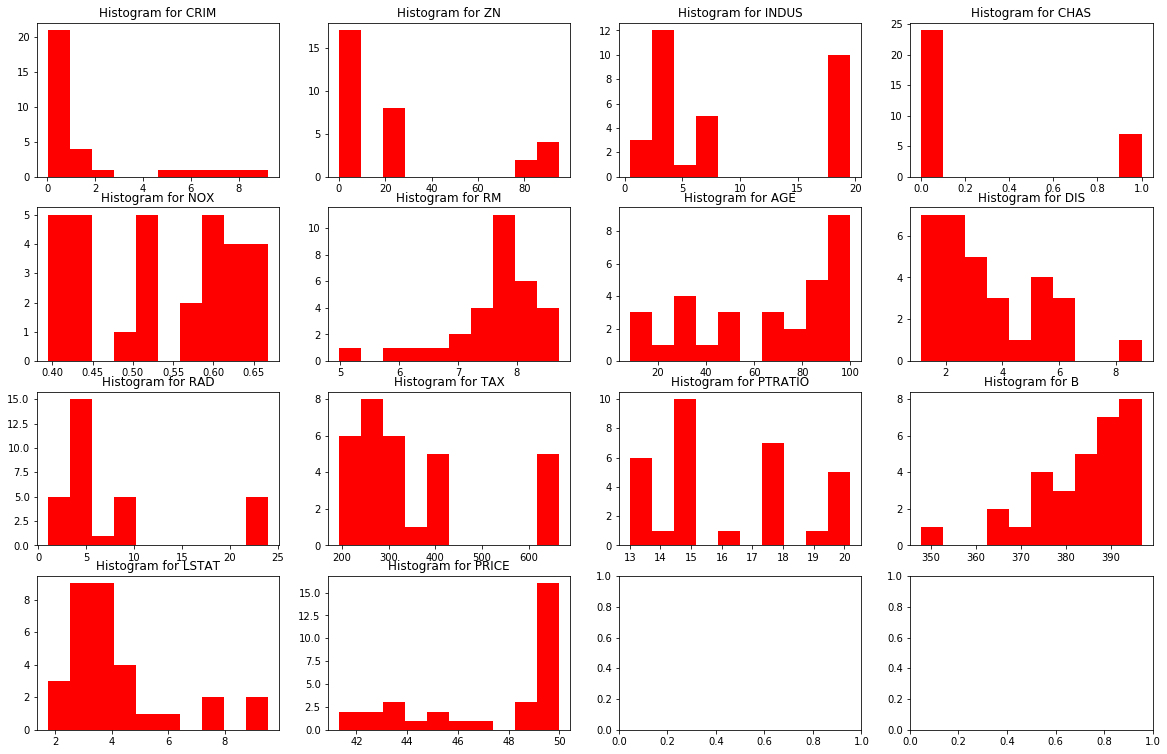

In [7]:
gotta_plot_them_all(bos[bos['PRICE'] >= 40], color1='r')

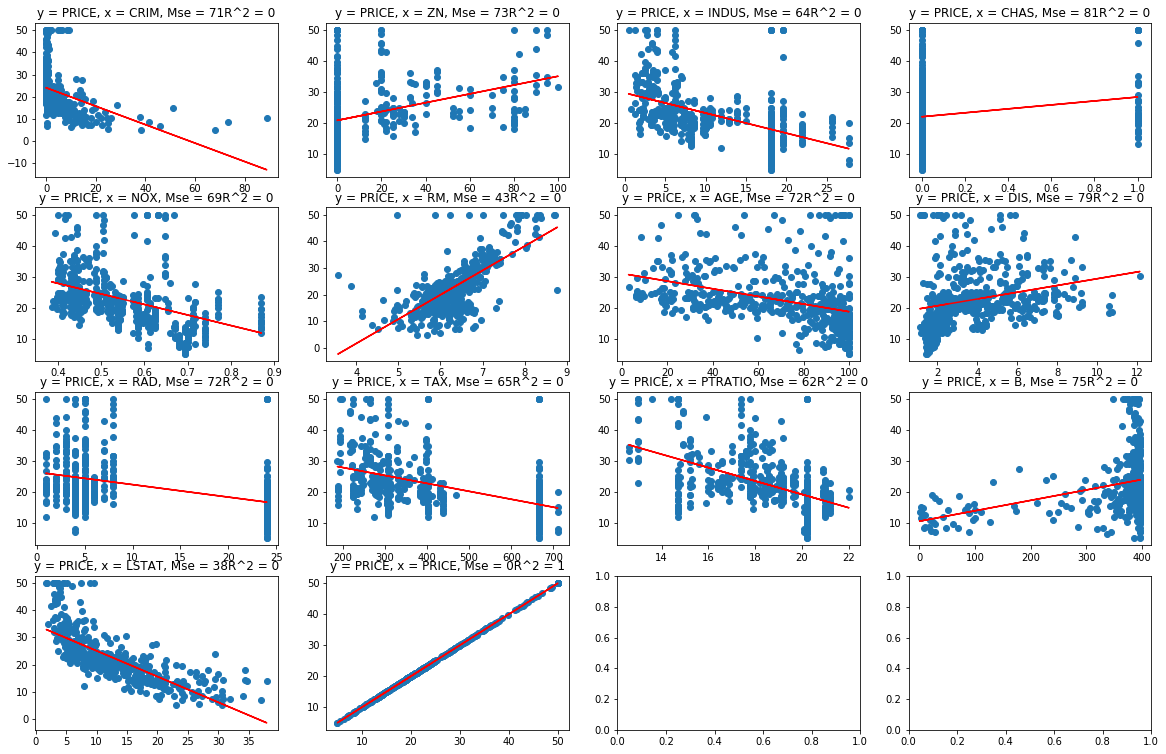

In [8]:
gotta_scatter_plot_them_all(bos)

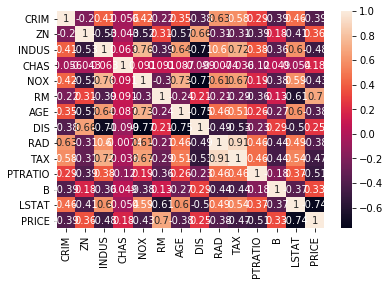

In [9]:
sns.heatmap(bos.corr(), annot=True)

In [10]:
def train_test_with_given_data(bos, feature_names, target, normalizer=None):
    X_train, X_test, y_train, y_test = train_test_split(bos[feature_names], bos[target], test_size=0.25, random_state=0)
    if normalizer is not None:
        X_train = normalizer.fit_transform(X_train)
        X_test = normalizer.transform(X_test)


    basic_reg = LinearRegression()
    basic_reg.fit(X_train, y_train)

    y_pred = basic_reg.predict(X_test)
    print('MSE from test data compared to prediction')
    print(mean_squared_error(y_test, y_pred))
    print('R^2 from test data compared to prediction')
    print(r2_score(y_test, y_pred))


In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

In [12]:
train_test_with_given_data(bos, boston.feature_names, 'PRICE', normalizer=None)

MSE from test data compared to prediction
29.782245092302336
R^2 from test data compared to prediction
0.6354638433202133


In [13]:
train_test_with_given_data(bos, boston.feature_names, 'PRICE', normalizer=min_max_scaler)

MSE from test data compared to prediction
29.782245092302404
R^2 from test data compared to prediction
0.6354638433202124


In [14]:
train_test_with_given_data(bos, boston.feature_names, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
29.78224509230233
R^2 from test data compared to prediction
0.6354638433202133


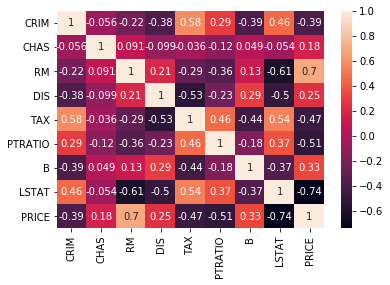

In [15]:
droped_data = bos.drop(columns=['INDUS', 'AGE', 'RAD', 'NOX', 'ZN'])
sns.heatmap(droped_data.corr(), annot=True)

In [16]:
no_high_corr = ['CRIM', 'CHAS', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_test_with_given_data(bos, no_high_corr, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
34.04915008109992
R^2 from test data compared to prediction
0.5832367146832218


In [17]:
no_indus = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_test_with_given_data(bos, no_indus, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
29.76638383690629
R^2 from test data compared to prediction
0.6356579858727398


In [18]:
no_age = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_test_with_given_data(bos, no_age, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
29.671100380505113
R^2 from test data compared to prediction
0.6368242601037121


In [19]:
no_age_indus = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train_test_with_given_data(bos, no_age_indus, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
29.65946777714551
R^2 from test data compared to prediction
0.6369666437456352


In [20]:
29.782245092302336 - 29.65946777714551

0.12277731515682433

In [21]:
rm = ['RM']
train_test_with_given_data(bos, rm, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
43.472041677202206
R^2 from test data compared to prediction
0.4679000543136781


In [22]:
lthing = ['LSTAT']
train_test_with_given_data(bos, lthing, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
44.3103301732132
R^2 from test data compared to prediction
0.457639361556042


In [26]:
age = ['AGE']
train_test_with_given_data(bos, age, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
77.79552235715738
R^2 from test data compared to prediction
0.047778948864252935


In [36]:
rm_lthing = ['RM', 'LSTAT']
train_test_with_given_data(bos, rm_lthing, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
35.192296847182874
R^2 from test data compared to prediction
0.5692445415835345


In [28]:
29.782245092302336 - 29.65946777714551

0.12277731515682433

In [29]:
def train_test_for_mse(bos, feature_names, target, normalizer=None):
    X_train, X_test, y_train, y_test = train_test_split(bos[feature_names], bos[target], test_size=0.25)
    if normalizer is not None:
        X_train = normalizer.fit_transform(X_train)
        X_test = normalizer.transform(X_test)


    basic_reg = LinearRegression()
    basic_reg.fit(X_train, y_train)

    y_pred = basic_reg.predict(X_test)
    return mean_squared_error(y_test, y_pred)

In [30]:
def find_best_mse(p):
    lowest = [None, None]
    highest = [None, None]
    for i in p:
        mse_ls = []
        for j in range(100):
            mse_ls.append(train_test_for_mse(bos, list(i), 'PRICE', normalizer=standard_scaler))
        mean_mse = np.mean(mse_ls)
        if highest[0] is None:
            highest[0] = mean_mse
            highest[1] = i
        elif highest[0] < mean_mse:
            highest[0] = mean_mse
            highest[1] = i
        if lowest[0] is None:
            lowest[0] = mean_mse
            lowest[1] = i
        elif lowest[0] > mean_mse:
            lowest[0] = mean_mse
            lowest[1] = i
    return (highest, lowest)
    

In [31]:
ls = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
combos = []
for i in range(9, len(ls)):
    for j in itertools.combinations(ls, i):
        combos.append(j)

In [32]:
len(combos)

1092

In [374]:
the_best = find_best_mse(combos)

In [375]:
the_best

([55.87022971547496,
  ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'B')],
 [23.19376682230157,
  ('CRIM',
   'ZN',
   'CHAS',
   'NOX',
   'RM',
   'AGE',
   'DIS',
   'RAD',
   'TAX',
   'PTRATIO',
   'B',
   'LSTAT')])

In [376]:
the_best = list(the_best[1][1])
train_test_with_given_data(bos, the_best, 'PRICE', normalizer=standard_scaler)

MSE from test data compared to prediction
29.76638383690629
R^2 from test data compared to prediction
0.6356579858727398


# PCA 

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# use pandas to read in the excel spreadsheet
df = bos


# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(df[boston.feature_names])

print(X_r)
print(pca.explained_variance_ratio_.cumsum())

[[-119.81884272   -5.56005586]
 [-168.89015548   10.11620863]
 [-169.31170747   14.0805323 ]
 ...
 [-138.38716306    0.9380922 ]
 [-137.50517338    4.2518251 ]
 [-139.19033295    1.00906423]]
[0.80582318 0.96887514]


In [58]:
X_train, X_test, y_train, y_test = train_test_split(bos[boston.feature_names], bos['PRICE'], test_size=0.25, random_state=0)

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

pca = PCA(n_components=2)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)



basic_reg = LinearRegression()
basic_reg.fit(X_train_reduced, y_train)

y_pred = basic_reg.predict(X_test_reduced)

print('Information kept')
print(pca.explained_variance_ratio_.cumsum())
print('MSE from test data compared to prediction')
print(mean_squared_error(y_test, y_pred))
print('R^2 from test data compared to prediction')
print(r2_score(y_test, y_pred))


Information kept
[0.53548769 0.66141028]
MSE from test data compared to prediction
70.62664127040222
R^2 from test data compared to prediction
0.13552640883447498


After passing data through the pca I tried scaling and it seems to lower the mse if you do min max. Though it raises mse slightly if you scale with a standard scaler

[0.81172669 0.96886707]
